In [199]:
import pandas as pd

In [200]:
from matplotlib import pyplot as plt

In [201]:
df_2021 = pd.read_csv('2021_ca.csv')
df_2019= pd.read_csv('2019_ca.csv')
df_2021

,year,county,zipcode,rate,num1,num2,num3
0,2021,Alpine,Alpine,67.297500,73.350000,780.767500,33.65000
1,2021,Alpine,California,16.777500,16.377500,17.187500,0.20675
2,2021,Alpine,00044,0.000000,NaN,NaN,NaN
3,2021,Alpine,96120,0.000000,0.000000,0.000000,0.00000
4,2021,Alameda,94612,114.645753,33.203632,294.172985,55.26028
...,...,...,...,...,...,...,...
1808,2021,Yuba,95919,0.000000,0.000000,0.000000,0.00000
1809,2021,Yuba,95925,0.000000,0.000000,0.000000,0.00000
1810,2021,Yuba,95935,0.000000,0.000000,0.000000,0.00000
1811,2021,Yuba,95962,0.000000,0.000000,0.000000,0.00000


In [202]:
df_2019.describe()

,year,rate,num1,num2,num3
count,1799.0,1799.000000,1735.000000,1739.000000,1739.000000
mean,2019.0,7.560387,1.952593,181.499999,4.863468
std,0.0,15.163029,5.176965,1183.642096,11.655930
min,2019.0,0.000000,0.000000,0.000000,0.000000
25%,2019.0,0.000000,0.000000,0.000000,0.000000
50%,2019.0,3.923355,0.189939,23.876965,2.541663
75%,2019.0,9.111706,2.303311,47.465887,5.238774
max,2019.0,236.668796,115.357650,27258.105506,175.878811


In [203]:
def filter_zipcode(row):
    if row["zipcode"].isdigit():
        return True
    else:
        return False
df_2021_filtered = df_2021[df_2021.apply(filter_zipcode, axis=1)]
df_2019_filtered = df_2019[df_2019.apply(filter_zipcode, axis=1)]

In [204]:
def rateoutlier2021(row):
    if row['rate'] >= 54.10804:
        return False
    else:
        return True 

In [205]:
def rateoutlier2019(row):
    if row['rate'] >= 22.779265:
        return False
    else:
        return True

In [206]:
df_2021_filtered = df_2021_filtered.drop("num1",axis=1)
df_2021_filtered = df_2021_filtered.drop("num2",axis=1)
df_2021_filtered = df_2021_filtered.drop("num3",axis=1)

In [207]:
df_2019_filtered = df_2019_filtered.drop("num1",axis=1)
df_2019_filtered = df_2019_filtered.drop("num2",axis=1)
df_2019_filtered = df_2019_filtered.drop("num3",axis=1)

In [208]:
df_2021_filtered = df_2021_filtered[df_2021_filtered.apply(rateoutlier2021, axis = 1)]

In [209]:
df_2019_filtered = df_2019_filtered[df_2019_filtered.apply(rateoutlier2019, axis = 1)]

In [210]:
df_2021_filtered

,year,county,zipcode,rate
2,2021,Alpine,00044,0.000000
3,2021,Alpine,96120,0.000000
5,2021,Alameda,94607,39.908302
6,2021,Alameda,94609,38.075039
7,2021,Alameda,94621,37.624114
...,...,...,...,...
1808,2021,Yuba,95919,0.000000
1809,2021,Yuba,95925,0.000000
1810,2021,Yuba,95935,0.000000
1811,2021,Yuba,95962,0.000000


In [211]:
df_2019_filtered

,year,county,zipcode,rate
0,2019,Alameda:,94610,21.527439
1,2019,Alameda:,94621,20.812367
2,2019,Alameda:,94608,16.525211
3,2019,Alameda:,94606,14.899429
4,2019,Alameda:,94605,14.599118
...,...,...,...,...
1794,2019,Yuba:,95919,0.000000
1795,2019,Yuba:,95925,0.000000
1796,2019,Yuba:,95935,0.000000
1797,2019,Yuba:,95962,0.000000


In [212]:
df_2021_filtered.rename(columns = {'rate': 'rate2021'}, inplace = True)

In [213]:
df_2021_filtered

,year,county,zipcode,rate2021
2,2021,Alpine,00044,0.000000
3,2021,Alpine,96120,0.000000
5,2021,Alameda,94607,39.908302
6,2021,Alameda,94609,38.075039
7,2021,Alameda,94621,37.624114
...,...,...,...,...
1808,2021,Yuba,95919,0.000000
1809,2021,Yuba,95925,0.000000
1810,2021,Yuba,95935,0.000000
1811,2021,Yuba,95962,0.000000


In [214]:
df_2019_filtered.rename(columns = {'rate': 'rate2019'}, inplace = True)

In [215]:
df_2019_filtered["zip"] = df_2019_filtered["zipcode"]

In [216]:
df_2021_filtered = df_2021_filtered.drop("year",axis=1)
df_2021_filtered = df_2021_filtered.drop("county",axis=1)
df_2021_filtered

,zipcode,rate2021
2,00044,0.000000
3,96120,0.000000
5,94607,39.908302
6,94609,38.075039
7,94621,37.624114
...,...,...
1808,95919,0.000000
1809,95925,0.000000
1810,95935,0.000000
1811,95962,0.000000


In [217]:
df_joined=df_2019_filtered.set_index("zipcode").join(df_2021_filtered.set_index("zipcode"))

In [218]:
df_joined

,year,county,rate2019,zip,rate2021
zipcode,,,,,
00012,2019,Lassen:,0.000000,00012,0.000000
00016,2019,Kern:,0.000000,00016,0.000000
00017,2019,Fresno:,0.000000,00017,0.000000
00018,2019,Ventura:,0.000000,00018,0.000000
00019,2019,Lassen:,0.000000,00019,0.000000
...,...,...,...,...,...
96146,2019,Placer:,0.000000,96146,0.000000
96148,2019,Placer:,0.000000,96148,0.000000
96150,2019,El Dorado:,5.066595,96150,28.845367


In [219]:
df_joined = df_joined.drop('year', axis=1)

In [220]:
df_joined

,county,rate2019,zip,rate2021
zipcode,,,,
00012,Lassen:,0.000000,00012,0.000000
00016,Kern:,0.000000,00016,0.000000
00017,Fresno:,0.000000,00017,0.000000
00018,Ventura:,0.000000,00018,0.000000
00019,Lassen:,0.000000,00019,0.000000
...,...,...,...,...
96146,Placer:,0.000000,96146,0.000000
96148,Placer:,0.000000,96148,0.000000
96150,El Dorado:,5.066595,96150,28.845367


In [221]:
df_joined.dropna(inplace = True)
df_joined

,county,rate2019,zip,rate2021
zipcode,,,,
00012,Lassen:,0.000000,00012,0.000000
00016,Kern:,0.000000,00016,0.000000
00017,Fresno:,0.000000,00017,0.000000
00018,Ventura:,0.000000,00018,0.000000
00019,Lassen:,0.000000,00019,0.000000
...,...,...,...,...
96146,Placer:,0.000000,96146,0.000000
96148,Placer:,0.000000,96148,0.000000
96150,El Dorado:,5.066595,96150,28.845367


In [222]:
df_joined['2021-2019'] = df_joined['rate2021'] - df_joined['rate2019']

In [223]:
df_joined

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
00012,Lassen:,0.000000,00012,0.000000,0.000000
00016,Kern:,0.000000,00016,0.000000,0.000000
00017,Fresno:,0.000000,00017,0.000000,0.000000
00018,Ventura:,0.000000,00018,0.000000,0.000000
00019,Lassen:,0.000000,00019,0.000000,0.000000
...,...,...,...,...,...
96146,Placer:,0.000000,96146,0.000000,0.000000
96148,Placer:,0.000000,96148,0.000000,0.000000
96150,El Dorado:,5.066595,96150,28.845367,23.778772


In [224]:
df_joined.describe()

,rate2019,rate2021,2021-2019
count,1582.000000,1582.000000,1582.000000
mean,4.720178,11.357538,6.637360
std,5.637884,11.801337,10.580637
min,0.000000,0.000000,-20.470987
25%,0.000000,0.000000,0.000000
50%,2.986080,9.101688,3.419099
75%,7.956847,18.281779,11.734203
max,22.660796,53.943732,53.872865


Text(0.5, 1.0, 'Distribution of Differences in Age-Adjusted Rates of Opiod Rate Overdose Deaths in Zip Codes Between 2021 and 2019(2021- 2019) ')

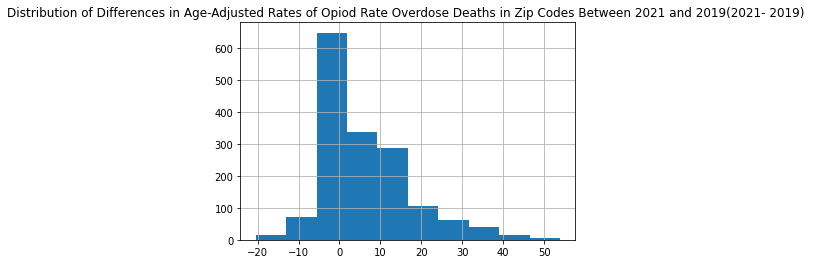

In [225]:
df_joined['2021-2019'].hist(bins=10)
plt.title("Distribution of Differences in Age-Adjusted Rates of Opiod Rate Overdose Deaths in Zip Codes Between 2021 and 2019(2021- 2019) ")

In [226]:
income = pd.read_excel('median_income.xlsx')

In [227]:
income

,Unnamed: 0,Unnamed: 1,Unnamed: 2,GEO_ID,NAME,S1903_C03_015E
0,NaN,NaN,NaN,id,Geographic Area Name,Estimate!!Median income (dollars)!!FAMILIES!!F...
1,NaN,NaN,NaN,8600000US00601,ZCTA5 00601,15721
2,NaN,NaN,NaN,8600000US00602,ZCTA5 00602,21060
3,NaN,NaN,NaN,8600000US00603,ZCTA5 00603,19340
4,NaN,NaN,NaN,8600000US00606,ZCTA5 00606,16176
...,...,...,...,...,...,...
33116,NaN,NaN,NaN,8600000US99923,ZCTA5 99923,-
33117,NaN,NaN,NaN,8600000US99925,ZCTA5 99925,80139
33118,NaN,NaN,NaN,8600000US99926,ZCTA5 99926,70147
33119,NaN,NaN,NaN,8600000US99927,ZCTA5 99927,-


In [228]:
def filter_income(row):
    if row["NAME"].startswith("G"):
        return False
    else:
        return True
income = income[income.apply(filter_income,axis=1)]

In [229]:
del income["Unnamed: 0"]
del income["Unnamed: 1"]
del income["Unnamed: 2"]
del income["GEO_ID"]
income

,NAME,S1903_C03_015E
1,ZCTA5 00601,15721
2,ZCTA5 00602,21060
3,ZCTA5 00603,19340
4,ZCTA5 00606,16176
5,ZCTA5 00610,23968
...,...,...
33116,ZCTA5 99923,-
33117,ZCTA5 99925,80139
33118,ZCTA5 99926,70147
33119,ZCTA5 99927,-


In [230]:
income["NAME"] = income["NAME"].str[6:11]

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87309/1836072002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["NAME"] = income["NAME"].str[6:11]


In [231]:
income

,NAME,S1903_C03_015E
1,00601,15721
2,00602,21060
3,00603,19340
4,00606,16176
5,00610,23968
...,...,...
33116,99923,-
33117,99925,80139
33118,99926,70147
33119,99927,-


In [232]:
income.rename(columns = {'S1903_C03_015E': 'medianincome'}, inplace = True)
income

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87309/489507736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'S1903_C03_015E': 'medianincome'}, inplace = True)


,NAME,medianincome
1,00601,15721
2,00602,21060
3,00603,19340
4,00606,16176
5,00610,23968
...,...,...
33116,99923,-
33117,99925,80139
33118,99926,70147
33119,99927,-


In [233]:
def numericincome(row):
    if isinstance(row['medianincome'], int):
        return False;
    if isinstance(row['medianincome'], str) & (not (row['medianincome'].isdigit()) ):
        return True
    else:
        return False
income[income.apply(lambda row: numericincome(row), axis=1)]

,NAME,medianincome
43,00694,-
92,00906,-
108,00934,-
109,00936,-
111,00950,-
...,...,...
33094,99790,-
33099,99825,-
33111,99903,-
33116,99923,-


In [234]:
def numover250K(row):
    if row["medianincome"] == "250,000+":
        return "260000"
    else:
        return row["medianincome"]
income['medianincome'] = income.apply(numover250K, axis = 1)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87309/3781912346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['medianincome'] = income.apply(numover250K, axis = 1)


In [235]:
def hyphen(row):
    if row["medianincome"] == "-":
        return False
    else:
        return True
income = income[income.apply(hyphen, axis=1)]

In [236]:
income

,NAME,medianincome
1,00601,15721
2,00602,21060
3,00603,19340
4,00606,16176
5,00610,23968
...,...,...
33114,99921,67000
33115,99922,44250
33117,99925,80139
33118,99926,70147


In [237]:
def inctofloat(row):
    return float(row["medianincome"])
income['medianincome'] = income.apply(inctofloat, axis = 1)

ValueError: could not convert string to float: '2,500-'

In [238]:
def numunder2500(row):
    if row["medianincome"] == '2,500-':
        return False
    else:
        return True
income = income[income.apply(numunder2500,axis=1)]

In [239]:
def inctofloat(row):
    return float(row["medianincome"])
income['medianincome'] = income.apply(inctofloat, axis = 1)
income

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87309/2825308443.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['medianincome'] = income.apply(inctofloat, axis = 1)


,NAME,medianincome
1,00601,15721.0
2,00602,21060.0
3,00603,19340.0
4,00606,16176.0
5,00610,23968.0
...,...,...
33114,99921,67000.0
33115,99922,44250.0
33117,99925,80139.0
33118,99926,70147.0


In [240]:
income.rename(columns = {'NAME': 'zipcode'}, inplace = True)
income

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_87309/3676087230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income.rename(columns = {'NAME': 'zipcode'}, inplace = True)


,zipcode,medianincome
1,00601,15721.0
2,00602,21060.0
3,00603,19340.0
4,00606,16176.0
5,00610,23968.0
...,...,...
33114,99921,67000.0
33115,99922,44250.0
33117,99925,80139.0
33118,99926,70147.0


In [241]:
df_joined_income=df_joined.set_index("zip").join(income.set_index("zipcode"))

In [242]:
df_joined_income

,county,rate2019,rate2021,2021-2019,medianincome
00012,Lassen:,0.000000,0.000000,0.000000,NaN
00016,Kern:,0.000000,0.000000,0.000000,NaN
00017,Fresno:,0.000000,0.000000,0.000000,NaN
00018,Ventura:,0.000000,0.000000,0.000000,NaN
00019,Lassen:,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...
96146,Placer:,0.000000,0.000000,0.000000,148438.0
96148,Placer:,0.000000,0.000000,0.000000,105729.0
96150,El Dorado:,5.066595,28.845367,23.778772,82407.0
96161,Nevada:,0.000000,22.739356,22.739356,115436.0


In [243]:
df_joined_income.dropna(inplace= True)

In [263]:
df_joined_income[df_joined_income['2021-2019']>47]

,county,rate2019,rate2021,2021-2019,medianincome
92091,San Diego:,0.000000,48.864460,48.864460,217955.0
93422,San Luis Obispo:,6.178936,53.943732,47.764796,93226.0
93445,San Luis Obispo:,0.000000,53.872865,53.872865,78910.0
93650,Fresno:,0.000000,48.911552,48.911552,43906.0
96052,Trinity:,0.000000,49.423701,49.423701,62097.0


Text(0, 0.5, 'Difference in Age-Adjusted Rate of Overdose Deaths')

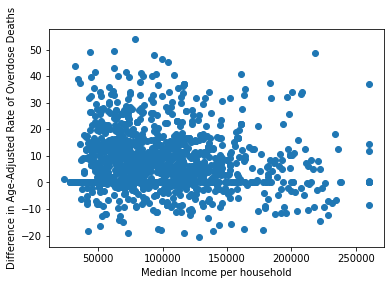

In [245]:
plt.scatter(df_joined_income.medianincome, df_joined_income["2021-2019"])
plt.xlabel("Median Income per household")
plt.ylabel("Difference in Age-Adjusted Rate of Overdose Deaths")


In [246]:
def inclessthan50000(row):
    if row['medianincome'] <= 50000:
        return True
    else:
        return False
def inclessthan100000(row):
    if row['medianincome'] <= 100000 and row['medianincome'] > 50000:
        return True
    else:
        return False
def inclessthan150000(row):
    if row['medianincome'] <= 150000 and row['medianincome'] > 100000:
        return True
    else:
        return False
def inclessthan200000(row):
    if row['medianincome'] <= 200000 and row['medianincome'] > 150000:
        return True
    else:
        return False
def inclessthan250000(row):
    if row['medianincome'] <= 250000 and row['medianincome'] > 200000:
        return True
    else:
        return False
def incgreaterthan250000(row):
    if row['medianincome'] >250000:
        return True
    else:
        return False

In [247]:
df_joinedlessthan50k = df_joined_income[df_joined_income.apply(inclessthan50000, axis = 1)]
df_joinedlessthan100k = df_joined_income[df_joined_income.apply(inclessthan100000, axis = 1)]
df_joinedlessthan200k = df_joined_income[df_joined_income.apply(inclessthan200000, axis = 1)]
df_joinedlessthan250k = df_joined_income[df_joined_income.apply(inclessthan250000, axis = 1)]
df_joinedgreaterthan250k = df_joined_income[df_joined_income.apply(incgreaterthan250000, axis = 1)]


Text(0, 0.5, 'Number of zipcodes')

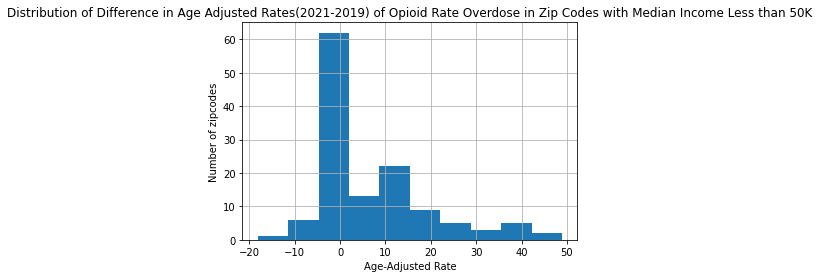

In [248]:
df_joinedlessthan50k['2021-2019'].hist(bins=10)
plt.title('Distribution of Difference in Age Adjusted Rates(2021-2019) of Opioid Rate Overdose in Zip Codes with Median Income Less than 50K')
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

df_joinedlessthan50k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Avg. Income Less than 50K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

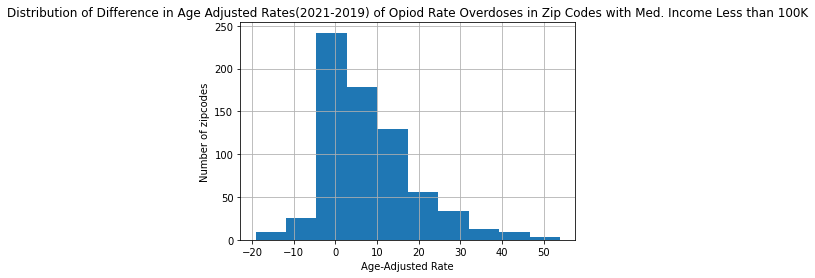

In [249]:
df_joinedlessthan100k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 100K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

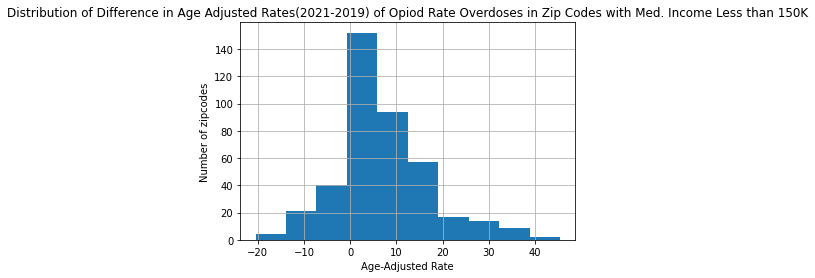

In [250]:
df_joinedlessthan150k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 150K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

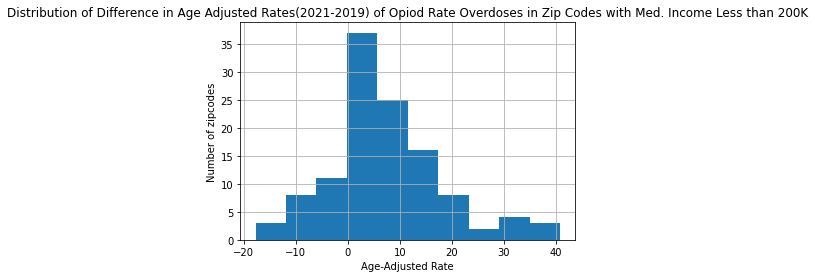

In [251]:
df_joinedlessthan200k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 200K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

df_joinedlessthan250k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Med. Income Less than 250K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

Text(0, 0.5, 'number of zipcodes')

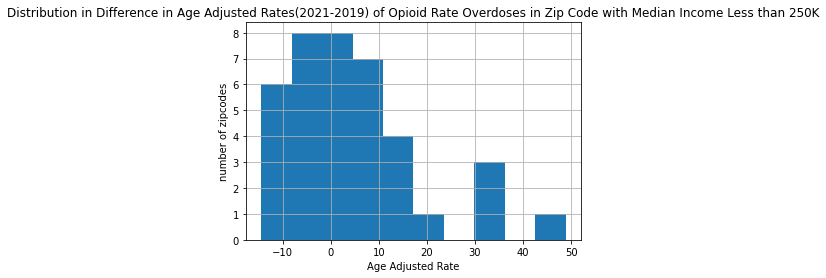

In [252]:
df_joinedlessthan250k["2021-2019"].hist(bins=10)
plt.title("Distribution in Difference in Age Adjusted Rates(2021-2019) of Opioid Rate Overdoses in Zip Code with Median Income Less than 250K")
plt.xlabel("Age Adjusted Rate")
plt.ylabel("number of zipcodes")

Text(0, 0.5, 'Number of zipcodes')

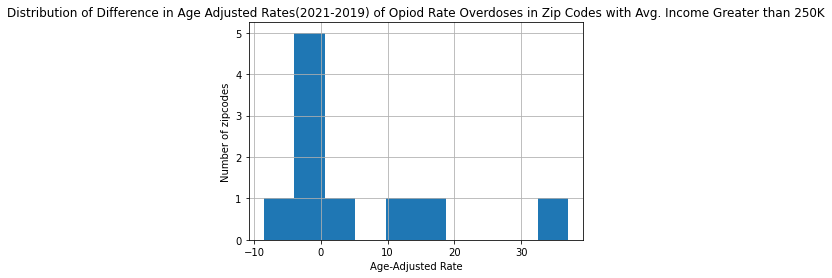

In [253]:
df_joinedgreaterthan250k['2021-2019'].hist(bins=10)
plt.title("Distribution of Difference in Age Adjusted Rates(2021-2019) of Opiod Rate Overdoses in Zip Codes with Avg. Income Greater than 250K")
plt.xlabel("Age-Adjusted Rate")
plt.ylabel("Number of zipcodes")

In [254]:
df_joined

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
00012,Lassen:,0.000000,00012,0.000000,0.000000
00016,Kern:,0.000000,00016,0.000000,0.000000
00017,Fresno:,0.000000,00017,0.000000,0.000000
00018,Ventura:,0.000000,00018,0.000000,0.000000
00019,Lassen:,0.000000,00019,0.000000,0.000000
...,...,...,...,...,...
96146,Placer:,0.000000,96146,0.000000,0.000000
96148,Placer:,0.000000,96148,0.000000,0.000000
96150,El Dorado:,5.066595,96150,28.845367,23.778772


In [255]:
df_joined.describe()

,rate2019,rate2021,2021-2019
count,1582.000000,1582.000000,1582.000000
mean,4.720178,11.357538,6.637360
std,5.637884,11.801337,10.580637
min,0.000000,0.000000,-20.470987
25%,0.000000,0.000000,0.000000
50%,2.986080,9.101688,3.419099
75%,7.956847,18.281779,11.734203
max,22.660796,53.943732,53.872865


In [258]:
df_joined[df_joined['2021-2019']>53]

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
93445,San Luis Obispo:,0.0,93445,53.872865,53.872865


In [259]:
df_joined[df_joined['2021-2019']< -20]

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
94595,Contra Costa:,20.470987,94595,0.0,-20.470987


In [260]:
df_joined[df_joined['2021-2019']>11.7]

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
90001,Los Angeles:,2.084256,90001,22.673220,20.588964
90004,Los Angeles:,5.362783,90004,20.862092,15.499310
90008,Los Angeles:,5.196753,90008,33.826045,28.629292
90010,Los Angeles:,0.000000,90010,13.523931,13.523931
90011,Los Angeles:,2.464922,90011,15.420765,12.955843
...,...,...,...,...,...
96122,Plumas:,0.000000,96122,34.576024,34.576024
96143,Placer:,0.000000,96143,22.915096,22.915096
96145,Placer:,0.000000,96145,18.069974,18.069974


In [261]:
df_joined[df_joined['2021-2019']>30]

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
90017,Los Angeles:,8.324696,90017,52.084256,43.759560
91377,Ventura:,3.828218,91377,38.849876,35.021658
91390,Los Angeles:,9.173657,91390,39.722812,30.549154
91607,Los Angeles:,0.000000,91607,30.337211,30.337211
92061,San Diego:,0.000000,92061,30.099417,30.099417
...,...,...,...,...,...
96008,Shasta:,0.000000,96008,30.361577,30.361577
96052,Trinity:,0.000000,96052,49.423701,49.423701
96073,Shasta:,0.000000,96073,35.572038,35.572038


In [262]:
df_joined.sort_values(by=['2021-2019'])

,county,rate2019,zip,rate2021,2021-2019
zipcode,,,,,
94595,Contra Costa:,20.470987,94595,0.000000,-20.470987
90248,Los Angeles:,19.179791,90248,0.000000,-19.179791
95655,Sacramento:,18.861947,95655,0.000000,-18.861947
95456,Mendocino:,18.163213,95456,0.000000,-18.163213
94085,Santa Clara:,19.906169,94085,1.823924,-18.082245
...,...,...,...,...,...
93422,San Luis Obispo:,6.178936,93422,53.943732,47.764796
92091,San Diego:,0.000000,92091,48.864460,48.864460
93650,Fresno:,0.000000,93650,48.911552,48.911552
